In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import time
import math
import datetime
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# CLEANING DATA FROM MERGED DATASETS


# LOADING MERGE_DF

In [2]:
import pandas as pd
merge_df = pd.read_csv('../raw_data/merge_df.csv')
merge_df.head()

/tmp/ipykernel_19618/47615108.py:2: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  merge_df = pd.read_csv('../raw_data/merge_df.csv')


,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1,12,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,0.46
1,HOBBIES_1_015_CA_1_validation,HOBBIES_1_015,HOBBIES_1,HOBBIES,CA_1,CA,d_1,4,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,0.70
2,HOBBIES_1_016_CA_1_validation,HOBBIES_1_016,HOBBIES_1,HOBBIES,CA_1,CA,d_1,5,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,0.70
3,HOBBIES_1_019_CA_1_validation,HOBBIES_1_019,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
4,HOBBIES_1_032_CA_1_validation,HOBBIES_1_032,HOBBIES_1,HOBBIES,CA_1,CA,d_1,9,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,0.47


In [3]:
merge_df

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1,12,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,0.46
1,HOBBIES_1_015_CA_1_validation,HOBBIES_1_015,HOBBIES_1,HOBBIES,CA_1,CA,d_1,4,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,0.70
2,HOBBIES_1_016_CA_1_validation,HOBBIES_1_016,HOBBIES_1,HOBBIES,CA_1,CA,d_1,5,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,0.70
3,HOBBIES_1_019_CA_1_validation,HOBBIES_1_019,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
4,HOBBIES_1_032_CA_1_validation,HOBBIES_1_032,HOBBIES_1,HOBBIES,CA_1,CA,d_1,9,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,0.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382595,FOODS_1_046_CA_2_validation,FOODS_1_046,FOODS_1,FOODS,CA_2,CA,d_1913,8,2016-04-24,11613,...,4,2016,NaN,NaN,NaN,NaN,0,0,0,0.98
382596,FOODS_1_055_CA_2_validation,FOODS_1_055,FOODS_1,FOODS,CA_2,CA,d_1913,4,2016-04-24,11613,...,4,2016,NaN,NaN,NaN,NaN,0,0,0,4.38
382597,FOODS_1_067_CA_2_validation,FOODS_1_067,FOODS_1,FOODS,CA_2,CA,d_1913,15,2016-04-24,11613,...,4,2016,NaN,NaN,NaN,NaN,0,0,0,2.00
382598,FOODS_1_085_CA_2_validation,FOODS_1_085,FOODS_1,FOODS,CA_2,CA,d_1913,12,2016-04-24,11613,...,4,2016,NaN,NaN,NaN,NaN,0,0,0,0.98


# DETECT MISSING VALUES 


In [4]:
missing_values = merge_df.isnull().sum()
print(missing_values)

id                   0
item_id              0
dept_id              0
cat_id               0
store_id             0
state_id             0
d                    0
sales                0
date                 0
wm_yr_wk             0
weekday              0
wday                 0
month                0
year                 0
event_name_1    351800
event_type_1    351800
event_name_2    381800
event_type_2    381800
snap_CA              0
snap_TX              0
snap_WI              0
sell_price       22638
dtype: int64


In [5]:
#FILLING THE EMPTY PLACES
merge_df['sell_price'].fillna(0, inplace=True)
merge_df['event_name_1'].fillna('missing', inplace=True)
merge_df['event_type_1'].fillna('missing', inplace=True)
merge_df['event_name_2'].fillna('missing', inplace=True)
merge_df['event_type_2'].fillna('missing', inplace=True)


/tmp/ipykernel_19618/1627116259.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merge_df['sell_price'].fillna(0, inplace=True)
/tmp/ipykernel_19618/1627116259.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [6]:
#CHECKING MISSING VALUES AGAIN
missing_values = merge_df.isnull().sum()
print(missing_values)

id              0
item_id         0
dept_id         0
cat_id          0
store_id        0
state_id        0
d               0
sales           0
date            0
wm_yr_wk        0
weekday         0
wday            0
month           0
year            0
event_name_1    0
event_type_1    0
event_name_2    0
event_type_2    0
snap_CA         0
snap_TX         0
snap_WI         0
sell_price      0
dtype: int64


### CHECKING DUPLICATED ROWS 

In [7]:

duplicated_rows = merge_df[merge_df.duplicated()]

print("Duplicated rows:")
print(duplicated_rows)


Duplicated rows:
Empty DataFrame
Columns: [id, item_id, dept_id, cat_id, store_id, state_id, d, sales, date, wm_yr_wk, weekday, wday, month, year, event_name_1, event_type_1, event_name_2, event_type_2, snap_CA, snap_TX, snap_WI, sell_price]
Index: []

[0 rows x 22 columns]


In [8]:
#NO DUPLICATED ROWS

# MISSING DATES

In [9]:

star_date = '2011-01-29'
end_date = '2016-06-19'

# Generate the dates
expected_dates = pd.date_range(start=star_date, end=end_date)

# format
merge_df['date'] = pd.to_datetime(merge_df['date'])

# extract unique dates
current_dates = merge_df['date'].dt.date.unique()

expected_dates_set = set(expected_dates)
current_dates_set = set(current_dates)

# verify
missing_dates = expected_dates_set - current_dates_set

if not missing_dates:
    print("No missing dates .")
else:
    print("there is no these dates")
    print(missing_dates)

there is no these dates
{Timestamp('2012-04-13 00:00:00'), Timestamp('2015-03-30 00:00:00'), Timestamp('2015-04-27 00:00:00'), Timestamp('2012-02-12 00:00:00'), Timestamp('2014-10-06 00:00:00'), Timestamp('2011-10-11 00:00:00'), Timestamp('2011-04-03 00:00:00'), Timestamp('2014-03-20 00:00:00'), Timestamp('2016-03-22 00:00:00'), Timestamp('2012-01-17 00:00:00'), Timestamp('2014-07-29 00:00:00'), Timestamp('2012-12-18 00:00:00'), Timestamp('2014-08-09 00:00:00'), Timestamp('2014-08-01 00:00:00'), Timestamp('2016-01-30 00:00:00'), Timestamp('2014-04-29 00:00:00'), Timestamp('2015-07-16 00:00:00'), Timestamp('2011-09-10 00:00:00'), Timestamp('2012-07-19 00:00:00'), Timestamp('2014-07-11 00:00:00'), Timestamp('2012-08-25 00:00:00'), Timestamp('2012-04-26 00:00:00'), Timestamp('2013-06-10 00:00:00'), Timestamp('2012-06-21 00:00:00'), Timestamp('2012-10-29 00:00:00'), Timestamp('2013-09-05 00:00:00'), Timestamp('2011-03-18 00:00:00'), Timestamp('2014-01-09 00:00:00'), Timestamp('2012-06-30 0

## FILLING THE MISSING DATES

In [10]:
import pandas as pd

# Convert the date column to datetime format, if necessary
merge_df['date'] = pd.to_datetime(merge_df['date'])

# Define the date range from January 29, 2011 to April 24, 2016
start_date = '2011-01-29'
end_date = '2016-04-24'

# Generate all dates within the range
expected_dates = pd.date_range(start=start_date, end=end_date)

# Create a DataFrame with all expected dates
expected_dates_df = pd.DataFrame({'date': expected_dates})

# Merge the expected dates DataFrame with the existing DataFrame
merge_df = pd.merge(expected_dates_df, merge_df, on='date', how='left')

# Check if there are any missing dates in the range
if merge_df['date'].isnull().any():
    print("There are still missing dates in the specified range.")
else:
    print("All missing dates have been filled correctly.")


All missing dates have been filled correctly.


In [11]:
merge_df.head(5)

,date,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,2011-01-29,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1,12,11101,...,1,2011,missing,missing,missing,missing,0,0,0,0.46
1,2011-01-29,HOBBIES_1_015_CA_1_validation,HOBBIES_1_015,HOBBIES_1,HOBBIES,CA_1,CA,d_1,4,11101,...,1,2011,missing,missing,missing,missing,0,0,0,0.70
2,2011-01-29,HOBBIES_1_016_CA_1_validation,HOBBIES_1_016,HOBBIES_1,HOBBIES,CA_1,CA,d_1,5,11101,...,1,2011,missing,missing,missing,missing,0,0,0,0.70
3,2011-01-29,HOBBIES_1_019_CA_1_validation,HOBBIES_1_019,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,11101,...,1,2011,missing,missing,missing,missing,0,0,0,0.00
4,2011-01-29,HOBBIES_1_032_CA_1_validation,HOBBIES_1_032,HOBBIES_1,HOBBIES,CA_1,CA,d_1,9,11101,...,1,2011,missing,missing,missing,missing,0,0,0,0.47


### SET AS INDEX 

In [12]:
# Convert the date column to datetime format, if necessary
merge_df['date'] = pd.to_datetime(merge_df['date'])

# Set the 'date' column as the DataFrame index without renaming it to 'index'
merge_df.set_index('date', inplace=True, drop=True)

# Check the index name
print("Index name:", merge_df.index.name)

Index name: date


In [13]:
merge_df.head(5)

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,wm_yr_wk,weekday,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1,12,11101,Saturday,...,1,2011,missing,missing,missing,missing,0,0,0,0.46
2011-01-29,HOBBIES_1_015_CA_1_validation,HOBBIES_1_015,HOBBIES_1,HOBBIES,CA_1,CA,d_1,4,11101,Saturday,...,1,2011,missing,missing,missing,missing,0,0,0,0.70
2011-01-29,HOBBIES_1_016_CA_1_validation,HOBBIES_1_016,HOBBIES_1,HOBBIES,CA_1,CA,d_1,5,11101,Saturday,...,1,2011,missing,missing,missing,missing,0,0,0,0.70
2011-01-29,HOBBIES_1_019_CA_1_validation,HOBBIES_1_019,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,11101,Saturday,...,1,2011,missing,missing,missing,missing,0,0,0,0.00
2011-01-29,HOBBIES_1_032_CA_1_validation,HOBBIES_1_032,HOBBIES_1,HOBBIES,CA_1,CA,d_1,9,11101,Saturday,...,1,2011,missing,missing,missing,missing,0,0,0,0.47


In [14]:
#dropping month and year because repetitive
# merge_df.drop(columns=['year','month'], inplace=True)


In [15]:
merge_df.to_csv('../raw_data/cleaned_merge_df.csv', index=False)

In [16]:
merge_df.head(5)

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,wm_yr_wk,weekday,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1,12,11101,Saturday,...,1,2011,missing,missing,missing,missing,0,0,0,0.46
2011-01-29,HOBBIES_1_015_CA_1_validation,HOBBIES_1_015,HOBBIES_1,HOBBIES,CA_1,CA,d_1,4,11101,Saturday,...,1,2011,missing,missing,missing,missing,0,0,0,0.70
2011-01-29,HOBBIES_1_016_CA_1_validation,HOBBIES_1_016,HOBBIES_1,HOBBIES,CA_1,CA,d_1,5,11101,Saturday,...,1,2011,missing,missing,missing,missing,0,0,0,0.70
2011-01-29,HOBBIES_1_019_CA_1_validation,HOBBIES_1_019,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,11101,Saturday,...,1,2011,missing,missing,missing,missing,0,0,0,0.00
2011-01-29,HOBBIES_1_032_CA_1_validation,HOBBIES_1_032,HOBBIES_1,HOBBIES,CA_1,CA,d_1,9,11101,Saturday,...,1,2011,missing,missing,missing,missing,0,0,0,0.47


## testing product

In [17]:
test_product = merge_df[merge_df['item_id']=='HOBBIES_1_272'].groupby('date').sum()

<Axes: >

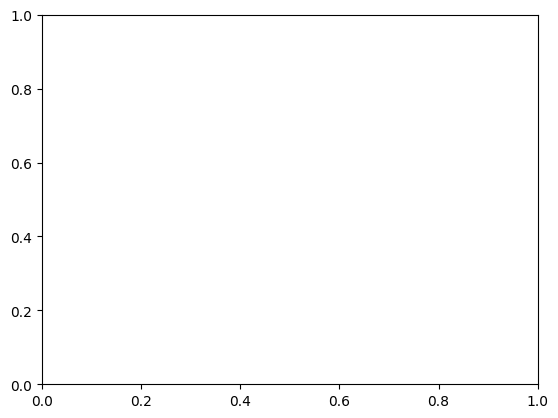

In [18]:
sns.lineplot(test_product['sales'])

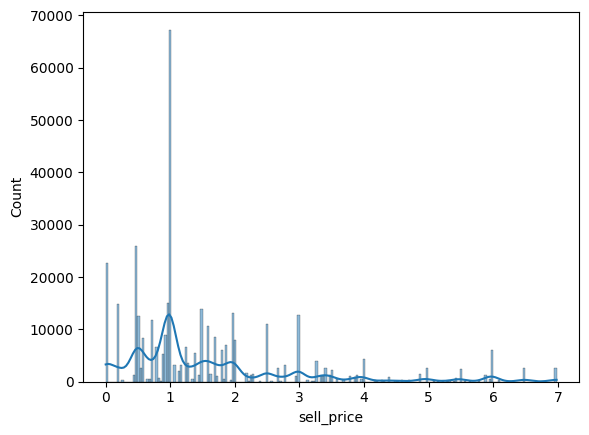

In [19]:
sns.histplot(merge_df['sell_price'], bins=200,kde = True);

# MinMax Scaler & OneHotEncoder

In [20]:
# Scale 'sell_price' and 'year' by using MinMaxScaler
minmax_scaler = MinMaxScaler()

merge_df[['sell_price']] = minmax_scaler.fit_transform(merge_df[['sell_price']])
merge_df[['year']] = minmax_scaler.fit_transform(merge_df[['year']])

In [21]:
merge_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,wm_yr_wk,weekday,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1,12,11101,Saturday,...,1,0.0,missing,missing,missing,missing,0,0,0,0.065903
2011-01-29,HOBBIES_1_015_CA_1_validation,HOBBIES_1_015,HOBBIES_1,HOBBIES,CA_1,CA,d_1,4,11101,Saturday,...,1,0.0,missing,missing,missing,missing,0,0,0,0.100287
2011-01-29,HOBBIES_1_016_CA_1_validation,HOBBIES_1_016,HOBBIES_1,HOBBIES,CA_1,CA,d_1,5,11101,Saturday,...,1,0.0,missing,missing,missing,missing,0,0,0,0.100287
2011-01-29,HOBBIES_1_019_CA_1_validation,HOBBIES_1_019,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,11101,Saturday,...,1,0.0,missing,missing,missing,missing,0,0,0,0.000000
2011-01-29,HOBBIES_1_032_CA_1_validation,HOBBIES_1_032,HOBBIES_1,HOBBIES,CA_1,CA,d_1,9,11101,Saturday,...,1,0.0,missing,missing,missing,missing,0,0,0,0.067335


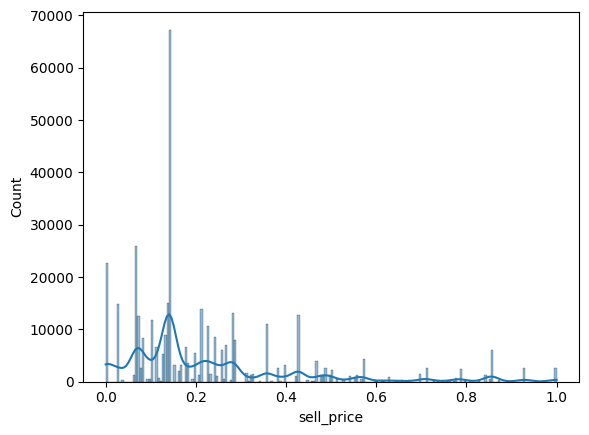

In [22]:
sns.histplot(merge_df['sell_price'], bins=200,kde = True);

In [23]:
merge_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,wm_yr_wk,weekday,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1,12,11101,Saturday,...,1,0.0,missing,missing,missing,missing,0,0,0,0.065903
2011-01-29,HOBBIES_1_015_CA_1_validation,HOBBIES_1_015,HOBBIES_1,HOBBIES,CA_1,CA,d_1,4,11101,Saturday,...,1,0.0,missing,missing,missing,missing,0,0,0,0.100287
2011-01-29,HOBBIES_1_016_CA_1_validation,HOBBIES_1_016,HOBBIES_1,HOBBIES,CA_1,CA,d_1,5,11101,Saturday,...,1,0.0,missing,missing,missing,missing,0,0,0,0.100287
2011-01-29,HOBBIES_1_019_CA_1_validation,HOBBIES_1_019,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,11101,Saturday,...,1,0.0,missing,missing,missing,missing,0,0,0,0.000000
2011-01-29,HOBBIES_1_032_CA_1_validation,HOBBIES_1_032,HOBBIES_1,HOBBIES,CA_1,CA,d_1,9,11101,Saturday,...,1,0.0,missing,missing,missing,missing,0,0,0,0.067335


In [24]:
# Check unique values
print(f"The unique values for 'cat_id' are {merge_df['cat_id'].unique()}")

# Instantiate the OneHotEncoder
ohe = OneHotEncoder(sparse_output = False) 

# Fit encoder
ohe.fit(merge_df[['cat_id']]) 

# Display the detected categories
print(f"The categories detected by the OneHotEncoder are {ohe.categories_}")

# Display the generated names
print(f"The column names for the encoded values are {ohe.get_feature_names_out()}")

# Transform the current "cat_id" column
merge_df[ohe.get_feature_names_out()] = ohe.transform(merge_df[['cat_id']])

# Drop the column "cat_id" which has been encoded
merge_df.drop(columns = ['cat_id'], inplace = True)

The unique values for 'cat_id' are ['HOBBIES' 'HOUSEHOLD' 'FOODS']
The categories detected by the OneHotEncoder are [array(['FOODS', 'HOBBIES', 'HOUSEHOLD'], dtype=object)]
The column names for the encoded values are ['cat_id_FOODS' 'cat_id_HOBBIES' 'cat_id_HOUSEHOLD']


In [25]:
merge_df.head()

,id,item_id,dept_id,store_id,state_id,d,sales,wm_yr_wk,weekday,wday,...,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,cat_id_FOODS,cat_id_HOBBIES,cat_id_HOUSEHOLD
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,CA_1,CA,d_1,12,11101,Saturday,1,...,missing,missing,missing,0,0,0,0.065903,0.0,1.0,0.0
2011-01-29,HOBBIES_1_015_CA_1_validation,HOBBIES_1_015,HOBBIES_1,CA_1,CA,d_1,4,11101,Saturday,1,...,missing,missing,missing,0,0,0,0.100287,0.0,1.0,0.0
2011-01-29,HOBBIES_1_016_CA_1_validation,HOBBIES_1_016,HOBBIES_1,CA_1,CA,d_1,5,11101,Saturday,1,...,missing,missing,missing,0,0,0,0.100287,0.0,1.0,0.0
2011-01-29,HOBBIES_1_019_CA_1_validation,HOBBIES_1_019,HOBBIES_1,CA_1,CA,d_1,0,11101,Saturday,1,...,missing,missing,missing,0,0,0,0.000000,0.0,1.0,0.0
2011-01-29,HOBBIES_1_032_CA_1_validation,HOBBIES_1_032,HOBBIES_1,CA_1,CA,d_1,9,11101,Saturday,1,...,missing,missing,missing,0,0,0,0.067335,0.0,1.0,0.0


In [26]:
# Check unique values
print(f"The unique values for 'event_type_1' are {merge_df['event_type_1'].unique()}")

# Fit encoder
ohe.fit(merge_df[['event_type_1']]) 

# Display the detected categories
print(f"The categories detected by the OneHotEncoder are {ohe.categories_}")

# Display the generated names
print(f"The column names for the encoded values are {ohe.get_feature_names_out()}")

# Transform the current "cat_id" column
merge_df[ohe.get_feature_names_out()] = ohe.transform(merge_df[['event_type_1']])

# Drop the column "cat_id" which has been encoded
merge_df.drop(columns = ['event_type_1'], inplace = True)

The unique values for 'event_type_1' are ['missing' 'Sporting' 'Cultural' 'National' 'Religious']
The categories detected by the OneHotEncoder are [array(['Cultural', 'National', 'Religious', 'Sporting', 'missing'],
      dtype=object)]
The column names for the encoded values are ['event_type_1_Cultural' 'event_type_1_National' 'event_type_1_Religious'
 'event_type_1_Sporting' 'event_type_1_missing']


In [27]:
# Check unique values
print(f"The unique values for 'event_type_2' are {merge_df['event_type_2'].unique()}")

# Fit encoder
ohe.fit(merge_df[['event_type_2']]) 

# Display the detected categories
print(f"The categories detected by the OneHotEncoder are {ohe.categories_}")

# Display the generated names
print(f"The column names for the encoded values are {ohe.get_feature_names_out()}")

# Transform the current "cat_id" column
merge_df[ohe.get_feature_names_out()] = ohe.transform(merge_df[['event_type_2']])

# Drop the column "cat_id" which has been encoded
merge_df.drop(columns = ['event_type_2'], inplace = True)

The unique values for 'event_type_2' are ['missing' 'Cultural' 'Religious']
The categories detected by the OneHotEncoder are [array(['Cultural', 'Religious', 'missing'], dtype=object)]
The column names for the encoded values are ['event_type_2_Cultural' 'event_type_2_Religious' 'event_type_2_missing']


In [28]:
# Check unique values
print(f"The unique values for 'event_name_1' are {merge_df['event_name_1'].unique()}")

# Fit encoder
ohe.fit(merge_df[['event_name_1']]) 

# Display the detected categories
print(f"The categories detected by the OneHotEncoder are {ohe.categories_}")

# Display the generated names
print(f"The column names for the encoded values are {ohe.get_feature_names_out()}")

# Transform the current "cat_id" column
merge_df[ohe.get_feature_names_out()] = ohe.transform(merge_df[['event_name_1']])

# Drop the column "cat_id" which has been encoded
merge_df.drop(columns = ['event_name_1'], inplace = True)

The unique values for 'event_name_1' are ['missing' 'SuperBowl' 'ValentinesDay' 'PresidentsDay' 'LentStart'
 'LentWeek2' 'StPatricksDay' 'Purim End' 'OrthodoxEaster' 'Pesach End'
 'Cinco De Mayo' "Mother's day" 'MemorialDay' 'NBAFinalsStart'
 'NBAFinalsEnd' "Father's day" 'IndependenceDay' 'Ramadan starts'
 'Eid al-Fitr' 'LaborDay' 'ColumbusDay' 'Halloween' 'EidAlAdha'
 'VeteransDay' 'Thanksgiving' 'Christmas' 'Chanukah End' 'NewYear'
 'OrthodoxChristmas' 'MartinLutherKingDay' 'Easter']
The categories detected by the OneHotEncoder are [array(['Chanukah End', 'Christmas', 'Cinco De Mayo', 'ColumbusDay',
       'Easter', 'Eid al-Fitr', 'EidAlAdha', "Father's day", 'Halloween',
       'IndependenceDay', 'LaborDay', 'LentStart', 'LentWeek2',
       'MartinLutherKingDay', 'MemorialDay', "Mother's day",
       'NBAFinalsEnd', 'NBAFinalsStart', 'NewYear', 'OrthodoxChristmas',
       'OrthodoxEaster', 'Pesach End', 'PresidentsDay', 'Purim End',
       'Ramadan starts', 'StPatricksDay', 'SuperB

In [29]:
# Check unique values
print(f"The unique values for 'event_name_2' are {merge_df['event_name_2'].unique()}")

# Fit encoder
ohe.fit(merge_df[['event_name_2']]) 

# Display the detected categories
print(f"The categories detected by the OneHotEncoder are {ohe.categories_}")

# Display the generated names
print(f"The column names for the encoded values are {ohe.get_feature_names_out()}")

# Transform the current "cat_id" column
merge_df[ohe.get_feature_names_out()] = ohe.transform(merge_df[['event_name_2']])

# Drop the column "cat_id" which has been encoded
merge_df.drop(columns = ['event_name_2'], inplace = True)

The unique values for 'event_name_2' are ['missing' 'Easter' 'Cinco De Mayo' 'OrthodoxEaster' "Father's day"]
The categories detected by the OneHotEncoder are [array(['Cinco De Mayo', 'Easter', "Father's day", 'OrthodoxEaster',
       'missing'], dtype=object)]
The column names for the encoded values are ['event_name_2_Cinco De Mayo' 'event_name_2_Easter'
 "event_name_2_Father's day" 'event_name_2_OrthodoxEaster'
 'event_name_2_missing']


In [30]:
merge_df.head()


,id,item_id,dept_id,store_id,state_id,d,sales,wm_yr_wk,weekday,wday,...,event_name_1_SuperBowl,event_name_1_Thanksgiving,event_name_1_ValentinesDay,event_name_1_VeteransDay,event_name_1_missing,event_name_2_Cinco De Mayo,event_name_2_Easter,event_name_2_Father's day,event_name_2_OrthodoxEaster,event_name_2_missing
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,CA_1,CA,d_1,12,11101,Saturday,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2011-01-29,HOBBIES_1_015_CA_1_validation,HOBBIES_1_015,HOBBIES_1,CA_1,CA,d_1,4,11101,Saturday,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2011-01-29,HOBBIES_1_016_CA_1_validation,HOBBIES_1_016,HOBBIES_1,CA_1,CA,d_1,5,11101,Saturday,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2011-01-29,HOBBIES_1_019_CA_1_validation,HOBBIES_1_019,HOBBIES_1,CA_1,CA,d_1,0,11101,Saturday,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2011-01-29,HOBBIES_1_032_CA_1_validation,HOBBIES_1_032,HOBBIES_1,CA_1,CA,d_1,9,11101,Saturday,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [31]:
merge_df['wday'].value_counts()

wday
1    54800
2    54800
3    54600
4    54600
5    54600
6    54600
7    54600
Name: count, dtype: int64

In [32]:
merge_df['weekday'].value_counts()

weekday
Saturday     54800
Sunday       54800
Monday       54600
Tuesday      54600
Wednesday    54600
Thursday     54600
Friday       54600
Name: count, dtype: int64

In [33]:
#Encoding Cyclical Features for weekdays
# Notice that Sat starts as 1 till Fri as 7 for 'wday'
merge_df['wday_sin'] = np.sin(2 * np.pi * merge_df['wday'] /7.0)
merge_df['wday_cos'] = np.cos(2 * np.pi * merge_df['wday'] /7.0)

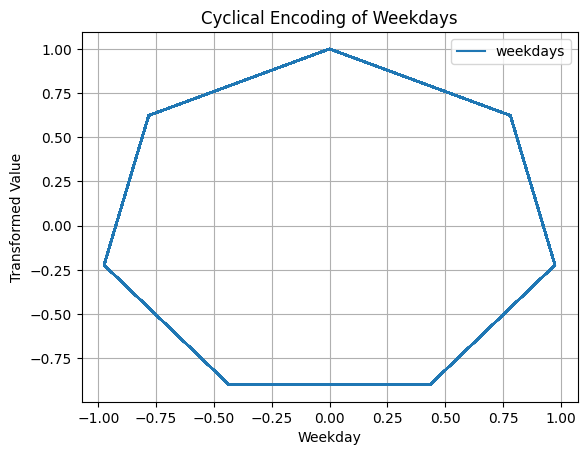

In [34]:
#plt.figure(figsize=(10, 5))
plt.plot(merge_df['wday_sin'], merge_df['wday_cos'], label='weekdays')
plt.title('Cyclical Encoding of Weekdays')
plt.xlabel('Weekday')
plt.ylabel('Transformed Value')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
#Encoding Cyclical Features for month

merge_df['month_sin'] = np.sin(2 * np.pi * merge_df['month'] /12.0)
merge_df['month_cos'] = np.cos(2 * np.pi * merge_df['month'] /12.0)

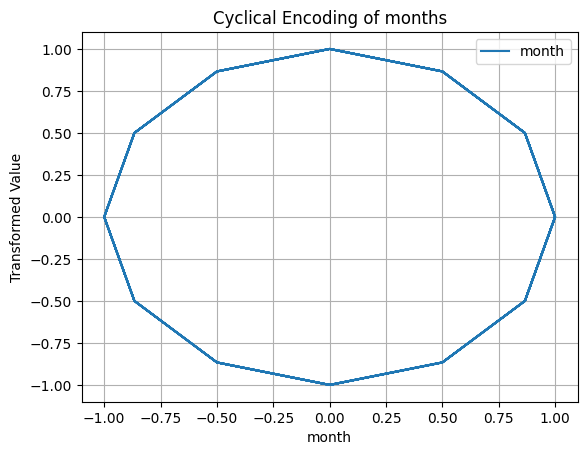

In [36]:
#plt.figure(figsize=(10, 5))
plt.plot(merge_df['month_sin'], merge_df['month_cos'], label='month')
plt.title('Cyclical Encoding of months')
plt.xlabel('month')
plt.ylabel('Transformed Value')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
merge_df.head()

,id,item_id,dept_id,store_id,state_id,d,sales,wm_yr_wk,weekday,wday,...,event_name_1_missing,event_name_2_Cinco De Mayo,event_name_2_Easter,event_name_2_Father's day,event_name_2_OrthodoxEaster,event_name_2_missing,wday_sin,wday_cos,month_sin,month_cos
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,CA_1,CA,d_1,12,11101,Saturday,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.781831,0.62349,0.5,0.866025
2011-01-29,HOBBIES_1_015_CA_1_validation,HOBBIES_1_015,HOBBIES_1,CA_1,CA,d_1,4,11101,Saturday,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.781831,0.62349,0.5,0.866025
2011-01-29,HOBBIES_1_016_CA_1_validation,HOBBIES_1_016,HOBBIES_1,CA_1,CA,d_1,5,11101,Saturday,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.781831,0.62349,0.5,0.866025
2011-01-29,HOBBIES_1_019_CA_1_validation,HOBBIES_1_019,HOBBIES_1,CA_1,CA,d_1,0,11101,Saturday,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.781831,0.62349,0.5,0.866025
2011-01-29,HOBBIES_1_032_CA_1_validation,HOBBIES_1_032,HOBBIES_1,CA_1,CA,d_1,9,11101,Saturday,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.781831,0.62349,0.5,0.866025


In [38]:
merge_df_scaled = merge_df.drop(columns=['d', 'wm_yr_wk','weekday'])

In [39]:
merge_df_scaled

,id,item_id,dept_id,store_id,state_id,sales,wday,month,year,snap_CA,...,event_name_1_missing,event_name_2_Cinco De Mayo,event_name_2_Easter,event_name_2_Father's day,event_name_2_OrthodoxEaster,event_name_2_missing,wday_sin,wday_cos,month_sin,month_cos
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,CA_1,CA,12,1,1,0.0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.781831,0.623490,0.500000,0.866025
2011-01-29,HOBBIES_1_015_CA_1_validation,HOBBIES_1_015,HOBBIES_1,CA_1,CA,4,1,1,0.0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.781831,0.623490,0.500000,0.866025
2011-01-29,HOBBIES_1_016_CA_1_validation,HOBBIES_1_016,HOBBIES_1,CA_1,CA,5,1,1,0.0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.781831,0.623490,0.500000,0.866025
2011-01-29,HOBBIES_1_019_CA_1_validation,HOBBIES_1_019,HOBBIES_1,CA_1,CA,0,1,1,0.0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.781831,0.623490,0.500000,0.866025
2011-01-29,HOBBIES_1_032_CA_1_validation,HOBBIES_1_032,HOBBIES_1,CA_1,CA,9,1,1,0.0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.781831,0.623490,0.500000,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-04-24,FOODS_1_046_CA_2_validation,FOODS_1_046,FOODS_1,CA_2,CA,8,2,4,1.0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.974928,-0.222521,0.866025,-0.500000
2016-04-24,FOODS_1_055_CA_2_validation,FOODS_1_055,FOODS_1,CA_2,CA,4,2,4,1.0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.974928,-0.222521,0.866025,-0.500000
2016-04-24,FOODS_1_067_CA_2_validation,FOODS_1_067,FOODS_1,CA_2,CA,15,2,4,1.0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.974928,-0.222521,0.866025,-0.500000


In [40]:
merge_df_scaled.to_csv("../raw_data/merge_df_scaled.csv",index=True)